<a href="https://colab.research.google.com/github/AngusTheMack/make-machine-learning/blob/master/MakeMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINST Dataset Example
I want to get an idea of how to use Tensorflow, and Keras. I think using the **Fashion MINST** dataset and attempting to classify the items with a Convolutional Neural Network will be a good rapid Proof Of Concept. Furthermore, it will give me a better understanding of using Google Colabratory ☕


Setting up the environment
* Tensorflow
* Numpy for working with big arrays, and maths
* Matplotlib for more math

In [103]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.eager as tfe

Populating the interactive namespace from numpy and matplotlib


Running in eager mode
* Using eager mode makes it more interactive
> Enabling eager execution changes how TensorFlow operations behave—now they immediately evaluate and return their values to Python. tf.Tensor objects reference concrete values instead of symbolic handles to nodes in a computational graph. Since there isn't a computational graph to build and run later in a session, it's easy to inspect results using print() or a debugger. Evaluating, printing, and checking tensor values does not break the flow for computing gradients.

From the [Tensor Flow Docs](https://www.tensorflow.org/guide/eager)

In [2]:
try:
  tf.enable_eager_execution()
  print('Running in Eager mode.')
except ValueError:
  print('Already running Eagerly')

Running in Eager mode.


Starting the initial MNIST dataset for number classification
* Simple
* Easy to understand
* A good Proof of Concept

Collected by the [National Institute of Standards and Technology](https://en.wikipedia.org/wiki/MNIST_database)

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

Display the data, to better understand what we are classifying

25 random images to get an idea about the data 


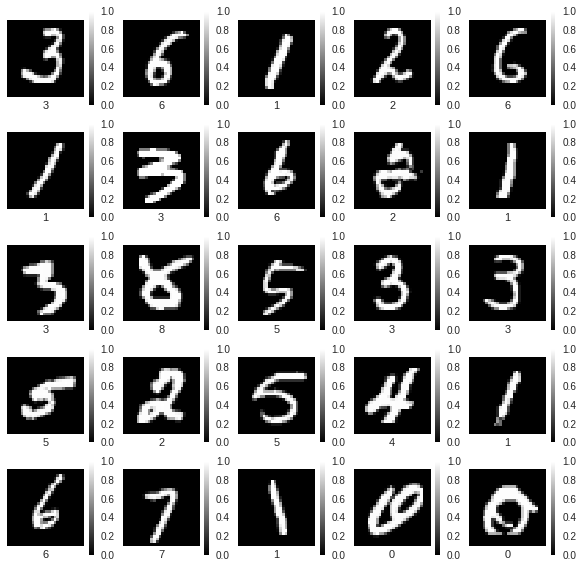

In [4]:
print("25 random images")
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  random_index = np.random.randint(0, len(x_train))
  plt.imshow(x_train[random_index], cmap='gray')
  plt.colorbar()
  numerical_label = y_train[random_index]
  plt.xlabel(numerical_label)

Setup the arrays that will be passed into our models
> Converts the given value to a Tensor.

This function converts Python objects of various types to Tensor objects. It accepts Tensor objects, numpy arrays, Python lists, and Python scalars. [From TensorFlow docs](https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor)

> A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes.

[Tensor Flow Docs](https://www.tensorflow.org/guide/tensors)

In [0]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int64)

Create the neural network, which will have

* Two layers
* A dropout of 0.2
* Rectifier Activation function on the first layer
* Softmax activation on the second layer

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Compiling the model
* An Optimizer - what dos this do?
* The Loss function we want to use - why crossentropy
* What metrics we want to gather 

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Running the model


In [8]:

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2245 - acc: 0.9336
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0991 - acc: 0.9692
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0694 - acc: 0.9784
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0551 - acc: 0.9825
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


[0.0689982324430719, 0.9794]

Testing the Model

In [0]:
predicted = model.predict_classes(x_test)

Outputting Confusion matrix


Checking 25 Random predictions


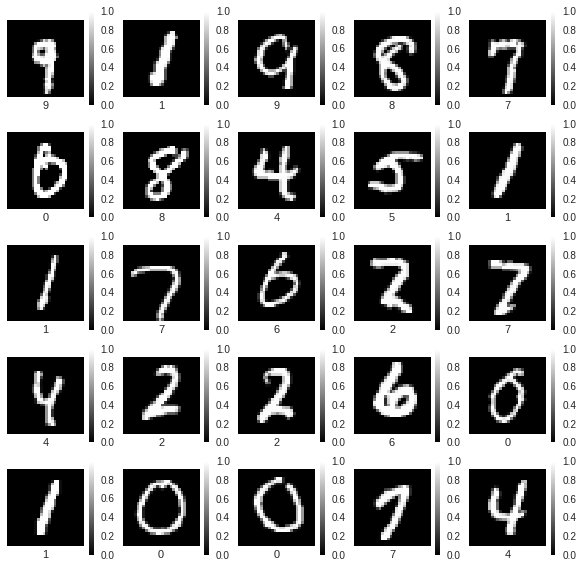

In [10]:
print("Checking 25 Random predictions")
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  random_index = np.random.randint(0, len(list(x_test)))
  plt.imshow(tf.gather(x_test, random_index), cmap='gray')
  plt.colorbar()
  numerical_label = predicted[random_index]
  plt.xlabel(numerical_label)

Setting up the dataset

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

Verifying input is in the correct form

Finished downloading MNIST images
50000 images to train with
Displaying 25 random images to get an idea of the dataset


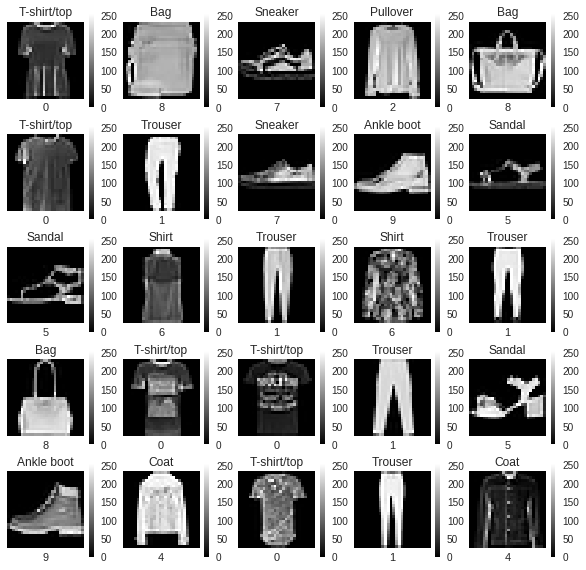

In [58]:
print("Finished downloading MNIST images")
print(len(train_images), "images to train with")
print("Displaying 25 random images to get an idea of the dataset")
randomFashionImages = []
  
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  random_index = np.random.randint(0, len(train_images))
  randomFashionImages.append(random_index)
  plt.imshow(train_images[random_index], cmap='gray')
  plt.colorbar()
  numerical_label = train_labels[random_index]
  text_description = text_labels[numerical_label]
  plt.xlabel(numerical_label)
  plt.title(text_description)

Set up the model to run, and printing out a summary of it

In [59]:
fashionModel = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
fashionModel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
fashionModel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
fashionModel.add(tf.keras.layers.Dropout(0.3))
fashionModel.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
fashionModel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
fashionModel.add(tf.keras.layers.Dropout(0.3))
fashionModel.add(tf.keras.layers.Flatten())
fashionModel.add(tf.keras.layers.Dense(256, activation='relu'))
fashionModel.add(tf.keras.layers.Dropout(0.5))
fashionModel.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
fashionModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

Compile the model

In [0]:
fashionModel.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Make the arrays TF friendly

In [0]:
train_images = train_images[:, :, :, np.newaxis]
validation_images  = validation_images[:, :, :, np.newaxis]

x_train = tf.convert_to_tensor(train_images,dtype=tf.float32)
y_train = tf.convert_to_tensor(train_labels, dtype=tf.int64)

x_test  = tf.convert_to_tensor(validation_images, dtype=tf.float32)
y_test  = tf.convert_to_tensor(validation_labels, dtype=tf.int64)

In [85]:
print(x_train.shape)

(50000, 28, 28, 1)


Train the model

In [62]:
fashionModel.fit(x_train, y_train, epochs=10)


Epoch 1/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.8521 - acc: 0.6961
Epoch 2/5
1563/1563 [==============================] - 118s 75ms/step - loss: 0.5106 - acc: 0.8103
Epoch 3/5
1563/1563 [==============================] - 118s 75ms/step - loss: 0.4559 - acc: 0.8342
Epoch 4/5
1563/1563 [==============================] - 121s 78ms/step - loss: 0.4207 - acc: 0.8477
Epoch 5/5
1563/1563 [==============================] - 118s 75ms/step - loss: 0.3956 - acc: 0.8534


Evaluate the model

In [63]:
fashionModel.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step


[0.3163210037708282, 0.8876]

Now get it to predict

In [0]:
predicted_classes = fashionModel.predict_classes(x_test)

With the models we outlined above


Checking 25 Random predictions


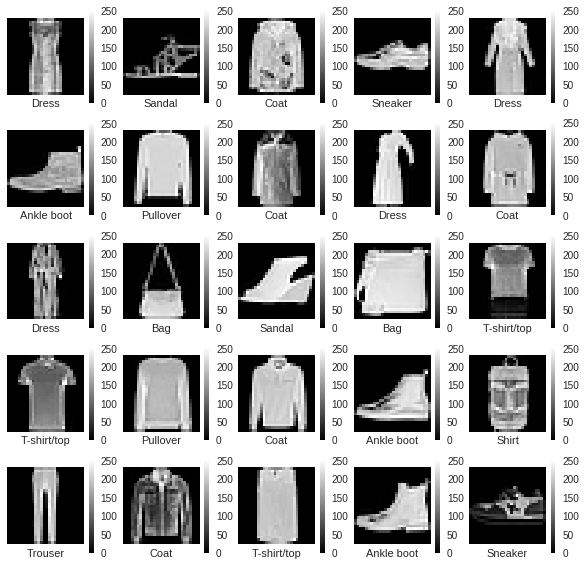

In [65]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Checking 25 Random predictions")
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  random_index = np.random.randint(0, len(list(x_test)))
  y = x_test[random_index].numpy()
  plt.imshow(y[:,:,0], cmap='gray')
  plt.colorbar()
  numerical_label = text_labels[predicted_classes[random_index]]
  plt.xlabel(numerical_label)

# CIFAR-20 Datatset
* Contains colour images
* Of different objects

Download the dataset, and set up the labels to classify things

In [0]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Creating training and testing 

In [0]:
# Take the last 10000 images from the training set to form a validation set 
train_labels = train_labels.squeeze()
validation_images = train_images[-10000:, :, :]
validation_labels = train_labels[-10000:]
train_images = train_images[:-10000, :, :]
train_labels = train_labels[:-10000]

Verifying the data types of the lables/images

In [72]:
print('train_images.shape = {}, data-type = {}'.format(train_images.shape, train_images.dtype))
print('train_labels.shape = {}, data-type = {}'.format(train_labels.shape, train_labels.dtype))

print('validation_images.shape = {}, data-type = {}'.format(validation_images.shape, validation_images.dtype))
print('validation_labels.shape = {}, data-type = {}'.format(validation_labels.shape, validation_labels.dtype))

train_images.shape = (40000, 32, 32, 3), data-type = uint8
train_labels.shape = (40000,), data-type = uint8
validation_images.shape = (10000, 32, 32, 3), data-type = uint8
validation_labels.shape = (10000,), data-type = uint8


Create data to be used

In [0]:
x_train = tf.convert_to_tensor(train_images,dtype=tf.float32)
y_train = tf.convert_to_tensor(train_labels, dtype=tf.int64)

x_test  = tf.convert_to_tensor(validation_images, dtype=tf.float32)
y_test  = tf.convert_to_tensor(validation_labels, dtype=tf.int64)

Print out 25 demo images

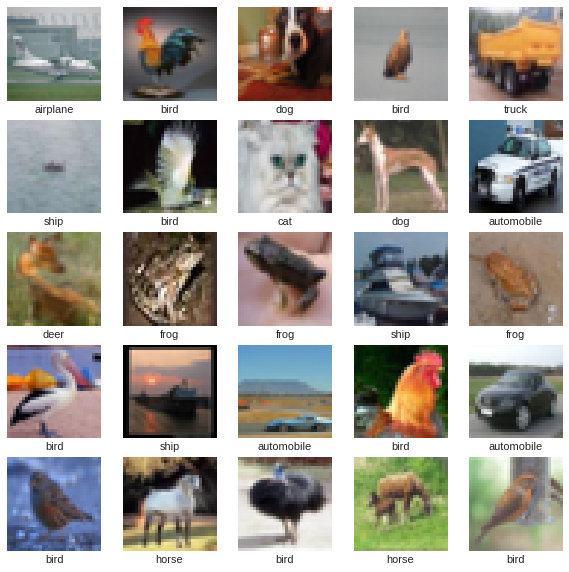

In [95]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  img_index = np.random.randint(0, 40000)
  plt.imshow(train_images[img_index])
  plt.xlabel(cifar_labels[train_labels[img_index]])

Create a new CNN model that takes in images, as the previous model did

In [113]:
objectModel = tf.keras.Sequential()
objectModel.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
objectModel.add(tf.keras.layers.Activation('relu'))
objectModel.add(tf.keras.layers.Conv2D(32, (3, 3)))
objectModel.add(tf.keras.layers.Activation('relu'))
objectModel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
objectModel.add(tf.keras.layers.Dropout(0.25))

objectModel.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
objectModel.add(tf.keras.layers.Activation('relu'))
objectModel.add(tf.keras.layers.Conv2D(64, (3, 3)))
objectModel.add(tf.keras.layers.Activation('relu'))
objectModel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
objectModel.add(tf.keras.layers.Dropout(0.25))

objectModel.add(tf.keras.layers.Flatten())
objectModel.add(tf.keras.layers.Dense(512))
objectModel.add(tf.keras.layers.Activation('relu'))
objectModel.add(tf.keras.layers.Dropout(0.5))
objectModel.add(tf.keras.layers.Dense(10))
objectModel.add(tf.keras.layers.Activation('softmax'))

#fashionModel = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
#fashionModel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
#fashionModel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#fashionModel.add(tf.keras.layers.Dropout(0.3))
#fashionModel.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
#fashionModel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#fashionModel.add(tf.keras.layers.Dropout(0.3))
#fashionModel.add(tf.keras.layers.Flatten())
#fashionModel.add(tf.keras.layers.Dense(256, activation='relu'))
#fashionModel.add(tf.keras.layers.Dropout(0.5))
#fashionModel.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
objectModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
__________

Compile the model


In [0]:
objectModel.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Make the images tensors

In [115]:
print(x_train.shape)

(40000, 32, 32, 3)


Run the model with training date

In [117]:
objectModel.fit(x_train, y_train, epochs=1)

Epoch 1/1
1250/1250 [==============================] - 298s 239ms/step - loss: 14.5215 - acc: 0.0990


Evaluate the model

In [118]:
objectModel.evaluate(x_test, y_test)

313/313 [==============================] - 19s 60ms/step


[14.511121138000489, 0.0997]

Predicate with the model


In [0]:
predicted_classes = objectModel.predict_classes(x_test)

Print out a demo

Checking 25 Random predictions


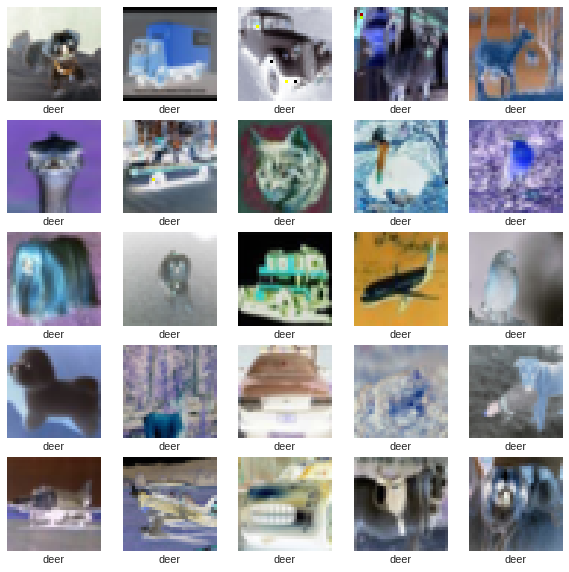

In [121]:
print("Checking 25 Random predictions")
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  random_index = np.random.randint(0, len(list(x_test)))
  y = x_test[random_index].numpy()
  plt.imshow(y)
  numerical_label = cifar_labels[predicted_classes[random_index]]
  plt.xlabel(numerical_label)